# Project: Predicting Red Wine Quality with Regression Machine Learning Algorithms


Table of Contents

1. Introduction:
    Scenario
    Goal
    Features & Predictor

2. Data Wrangling:
    Missing Values,
    Detecting/Handling Outliers with a Z-Score
    
3. Exploratory Data Analysis:
    Correlations
    Pairplots
    Filtering data by Tasty & Non-Tasty 
    Kernel Density Estimation (KDE)
    Regression Joint Plot
    Comparing Tasty & Non-Tasty Red Wine¶
    

4. Machine Learning + Predictive Analytics:
    Prepare Data for Modeling
    Modeling/Training
    Predictions
    K-Fold Cross Validation
  
5. Conclusions

*** Note include link to kaggle data
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv


# 1. Introduction

# Scenario:

You walk into a Pub in northern Paris, France. Where you order vodka and mention to the person sitting next to you that your a Data Scientist. The owner of the Pub, who happens to be a vintner lets you know that he is hiring a Data Scientist. He says he is loosing customers & needs help coming up with a new formula for his red wine collection. The vintner hands you this data to peform Data Analysis and predict the perfect ratio of ingredients to maximize his profit. 

# Goal:


- Predict the perfect ratio of ingredients for red wine. This is a numerical discrete outcome. 

- Explore with various Regression Models & see which yields  greatest accuracy. 
- Examine trends & correlations within our data
- Determine which features are important in determing the quality of red wine

Note: Due to the fact that we are predicting a numerical discreet value, we will be training various Regression Models 

# Features & Predictor:

Our Predictor (Y, Wine Quality) is determined by 11 Features (X):

    1.Fixed acidity - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
    2.Volatile acidity - amount of acetic acid ( which at too high of levels can lead to an unpleasant, vinegar taste)
    3.Citric acid - found in small quantities, citric acid can add 'freshness' and flavor to wines
    4.Residual sugar - amount of sugar remaining after fermentation stops
    5.Chlorides - amount of salt 
    6.Free sulfur dioxide - free form SO2 exists equilibrium between molecular SO2 (dissolved gas) and bisulfite ion
    7.Total sulfur dioxide - amount of free and bound forms of S02
    8.Density - density of water is close to that of water depending on the percent alcohol and sugar content
    9.pH - describes how acidic or basic a wine is on a scale from 0(very acidic) to 14(very basic); most wines are between 3-4
    10.Sulfates - additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial 
    11.Alcohol - percent alcohol content 

Note: Our data has only 1 type of data:
        Continuous (#): which is quantitative data that can be measured
      

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Data Wrangling

In [2]:
filePath = '/Users/jarar_zaidi/Downloads/wineQuality.csv'

data = pd.read_csv(filePath)

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print("(Rows, columns): " + str(data.shape))
data.columns 

(Rows, columns): (1599, 12)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
data.nunique(axis=0)# returns the number of unique values for each variable.

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [5]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The mean quality was 5.6, with its Max (best quality score) being 8.0 & its Min (worst quality score) being 3.0. Now lets see if we have any missing values we need to take care of. 


# Missing Values

In [6]:
# Display the Missing Values

print(data.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Display the Number of Missing Values for each column. We luckily have none.

# Detecting/Handling Outliers with Z-Score

A Z-Score is a measure of position that indicates the number of standard deviations a data value lies from the mean.
Any z-score less than -3 or greater than 3, is an outlier.

Note: From the empirical rule we see that 99.7% of our data should be within three standard deviations from the mean.


In [7]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]


In [8]:
threshold = 3
print(np.where(z > 3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

The first array is the list of row numbers & the 2nd array is the corresponding column number of the outlier. For example, the first outlier is in row 13, column 9. Once we calclulated the Z-score, we can remove the outlier to clean our data, by peforming the action below. 

In [9]:
Newdata = data[(z < 3).all(axis=1)]
Newdata

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


We have now succesffully removed 148+ rows which were outliers!

Note: Other outlier tools could have been used like IQR Score, Scatter Plots, Box Plots.

Lets take a look at our new cleaned up data

In [10]:
Newdata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.265382,2.387285,0.081425,15.104755,43.735355,0.996710,3.315934,0.642584,10.421089,5.659545
std,1.646458,0.168531,0.190934,0.862078,0.020966,9.309768,29.441284,0.001716,0.141096,0.129801,1.021588,0.781605
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


# 3. Exploratory Data Analysis

# Correlations

Correlation Matrix aka Heat Maps- let’s you see correlations between all variables.
Within seconds, you can see whether something is positively or negatively correlated with our predictor (target).

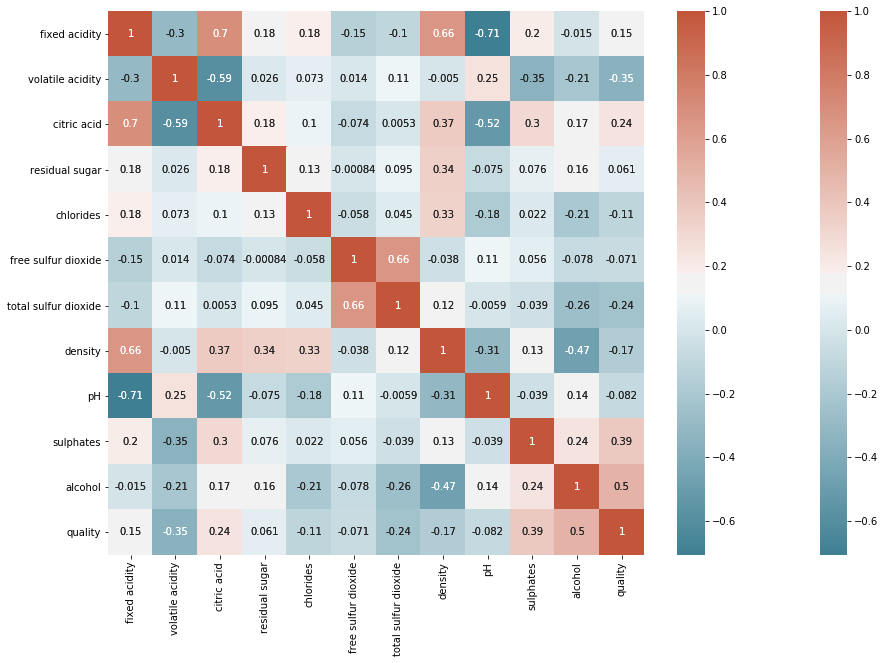

In [11]:
# calculate correlation matrix

corr = Newdata.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))

We can see there is a strong positive correlation between alcohol & target (our predictor). In fact, this is our most correlated feature in our datast, with a value of 0.5! Note that our alcohol feature was the percent alcohol content in a drink. This makes sense that a higher percent of alcohol content would yield a greater satsification for a customer purchasing red wine!

Next, we can see the second strongest positive correlation, 0.39, between sulphates & our quality predictor. It seems that people rate the quality higher when an additive (S02) is contributed to the drink. Sulphates acts as an antimicrobial.

Lastly, the strongest negative correlation is the volatile acidity, with a correlation of -0.35! This is as expected because too high acetic acid levels can lead to an unpleasant, vinegar taste!


# Pairplots

Pairplots are also a great way to immediately see the correlations between all variables. But you will see me make it with only continuous columns from our data, because with so many features, it can be difficult to see each one. So instead I will make a pairplot with only our continuous features.


Because we have 11 Features, lets select only significant features that correlate to our predictor, to further examine their correlation on a pairplot

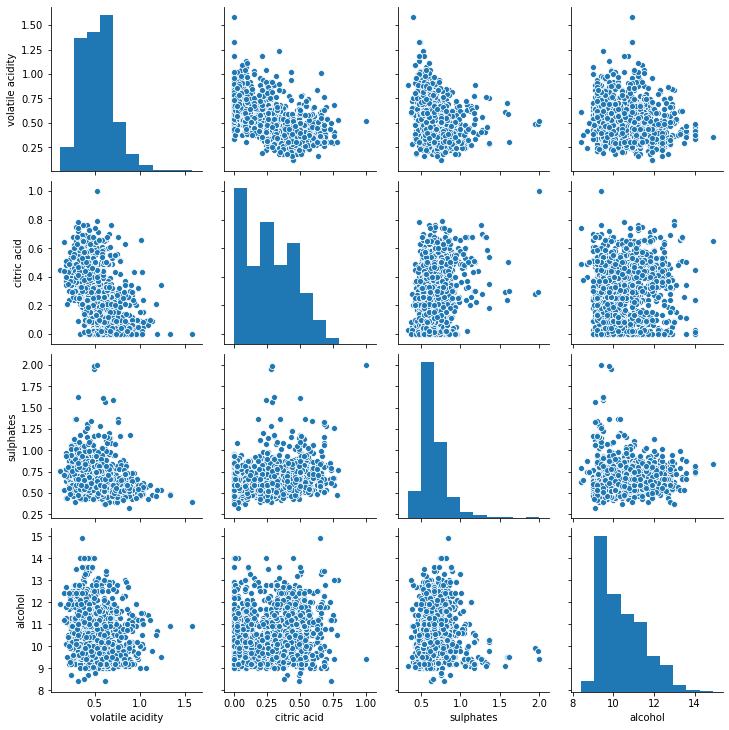

In [12]:
subData = data[['volatile acidity','citric acid','sulphates','alcohol']]
sns.pairplot(subData)

Chose to make a smaller pairplot with only the the strongest predictors, to dive deeper into the relationships. Also a great way to see if theirs a positive or negative correlation!
Note: This plot supports the correlations stated in the Heat Map.


# Filtering data by Tasty & Non-Tasty 

We will now do a form of Feature Engineering, where we create a new column classifiying if the  the wine quality is tasty or not based on its quality score!

This new column will be a binary Categorical Data where 0 or 1 indicates if the wine was considered "tasty".

In [13]:
Newdata['tasty'] = [0 if x < 6 else 1 for x in Newdata['quality']]

/Users/jarar_zaidi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
# DONT INCLUDE THIS IN ARTICLE!!!!!!!!!!
#Newdata.drop(columns=['goodquality']).head()

# Kernel Density Estimation (KDE)

A Kernel Density Estimation (KDE) estimate the probability density function (PDF) of a continuous random variable.

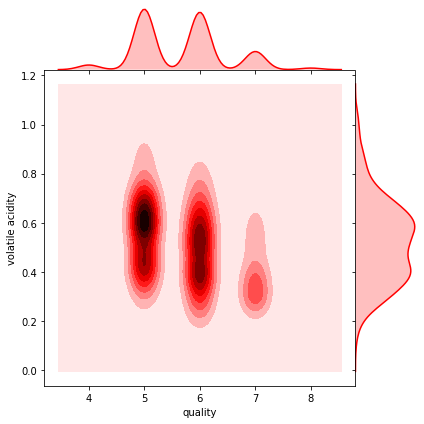

In [15]:
g = sns.jointplot("quality", "volatile acidity", data=Newdata,
           kind="kde", space=0, color="red")


A Kernel Density Estimation allows us to visualize the distribution of data over a continuous interval. From this plot, we can conclude that lower quality Wine is heavily inclined to higher levels of volatile acidity. This is as we expected because, large quantities of acetic acid yield an unpleasant vinegar taste!

# Regression Joint Plot

Text(0.5, 1, 'Fixed acidity vs. pH')

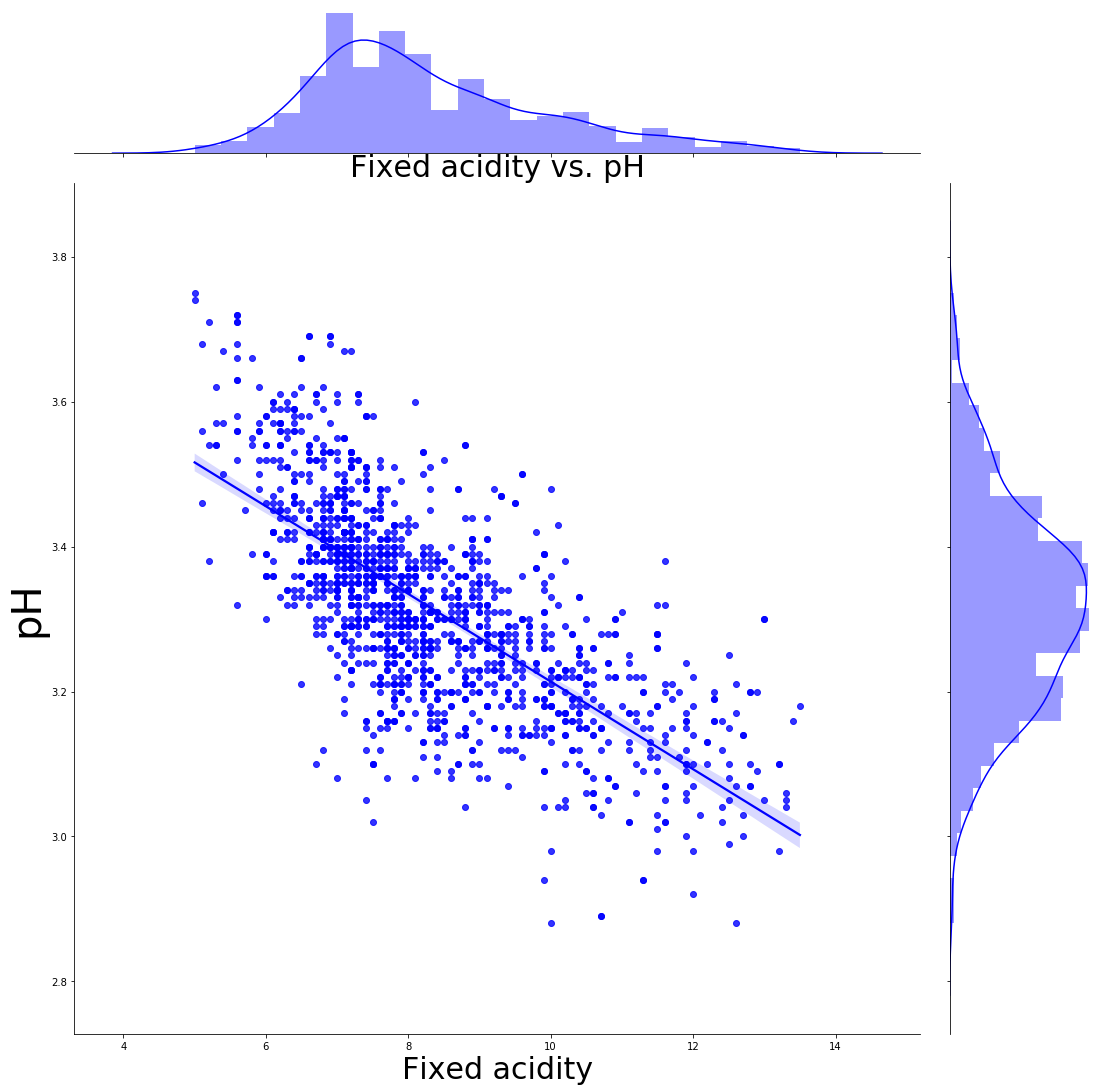

In [16]:
g = sns.jointplot(x= 'fixed acidity',y= 'pH', data=Newdata,
             kind = 'reg',height=15,color='blue')

plt.xlabel('Fixed acidity',size=30)
plt.ylabel('pH',size=40)
plt.title('Fixed acidity vs. pH',size=30)

From interpreting the Regression Join plot above, we can see a STRONG Negative correlation between pH level & fixed acidity. According to the HeatMap, these two features have a correlation coefficent of -0.71! 

# Comparing Tasty & Non-Tasty Red Wine

Text(26.411744791666678, 0.5, 'Volatile Acidity Level')

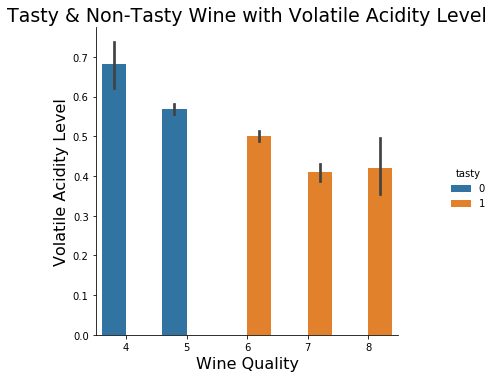

In [17]:
sns.catplot(x="quality", y="volatile acidity", hue="tasty", kind="bar", data=Newdata);

plt.title('Tasty & Non-Tasty Wine with Volatile Acidity Level',size=19)
plt.xlabel('Wine Quality',size=16)
plt.ylabel('Volatile Acidity Level',size=16)

This plot illustrates that high volatile acidity levels yields a terrible tasting wine. This is as we expected because, large quantities of acetic acid yield an unpleasant vinegar taste!

The advantages of showing the Box & Violin plots is that it shows the basic statistics of the data, as well as its distribution. These plots are often used to compare the distribution of a given variable across some categories.
It shows the median, IQR, & Tukey’s fence. (minimum, first quartile (Q1), median, third quartile (Q3), and maximum).
In addition it can provide us with outliers in our data.

Text(0, 0.5, 'Sulphate Level')

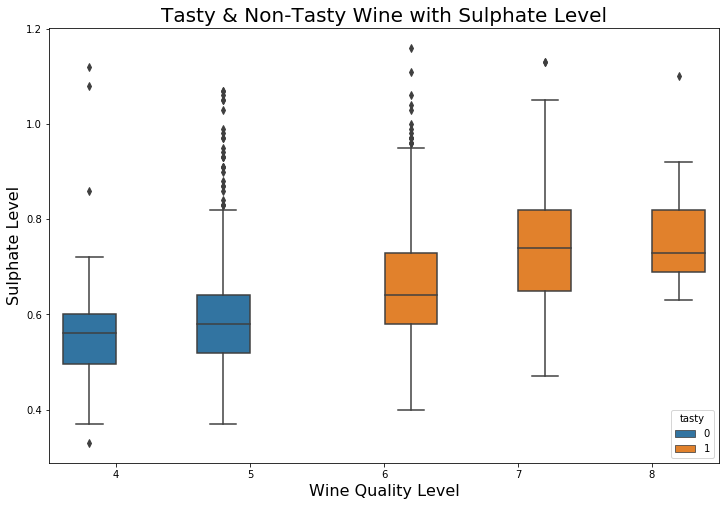

In [18]:

plt.figure(figsize=(12,8))
sns.boxplot(x="quality", y="sulphates", hue="tasty", data=Newdata )
plt.title("Tasty & Non-Tasty Wine with Sulphate Level", fontsize=20)
plt.xlabel("Wine Quality Level",fontsize=16)
plt.ylabel("Sulphate Level", fontsize=16)

Next, we examine this boxplot which helps further conclude that tasty red wine exhibit a heightened median for Sulphate Levels. If we recall back from our chemistry lessons, we remember that sulfates act as a additive which can contribute to sulfur dioxide gas (S02) levels, which is an antimicrobial!

Note: A antimicrobial is an agent that kills microorganisms & stops their growth. 

We can see now why these high sulfate levels would enhance a customers preference!


Text(0, 0.5, 'Percent alcohol content ')

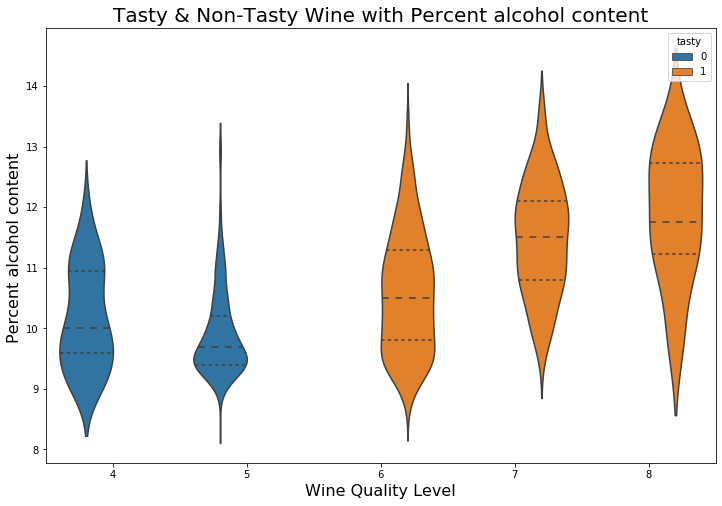

In [19]:
plt.figure(figsize=(12,8))
sns.violinplot(x="quality", y="alcohol", hue="tasty", inner='quartile',data= Newdata )
plt.title("Tasty & Non-Tasty Wine with Percent alcohol content",fontsize=20)
plt.xlabel("Wine Quality Level", fontsize=16)
plt.ylabel("Percent alcohol content ", fontsize=16)

After analyzing this violin plot we can conclude that the overall shape & distribution for tasty & non-tasty wine differ vastly. Tasty red wine exhibit a surplus median for percent alcohol content & thus a great distribution of their data is between 10 & 13,  while non-tasty red wine consists of a lower median Alcohol level content between 9.5 & 11.  

In [20]:
yummy = Newdata[Newdata['tasty']==1]
yummy.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tasty
count,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.0
mean,8.485642,0.477541,0.295286,2.400762,0.079785,14.560356,36.626429,0.996481,3.311868,0.682579,10.833990,6.275731,1.0
std,1.748845,0.162388,0.197117,0.871710,0.022654,9.061416,21.715608,0.001856,0.137032,0.127242,1.054157,0.490581,0.0
min,5.100000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.400000,8.700000,6.000000,1.0
25%,7.200000,0.360000,0.105000,1.900000,0.067000,7.000000,20.000000,0.995220,3.220000,0.590000,10.000000,6.000000,1.0
50%,8.100000,0.460000,0.310000,2.200000,0.077000,13.000000,31.000000,0.996400,3.310000,0.660000,10.800000,6.000000,1.0
75%,9.650000,0.582500,0.450000,2.550000,0.087000,19.000000,48.000000,0.997600,3.400000,0.760000,11.600000,7.000000,1.0
max,13.400000,1.040000,0.760000,6.700000,0.226000,45.000000,114.000000,1.002200,3.710000,1.160000,13.600000,8.000000,1.0


In [21]:
notYummy = Newdata[Newdata['tasty']==0]
notYummy.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tasty
count,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.000000,664.0
mean,8.101958,0.576770,0.229940,2.371310,0.083369,15.750000,52.161145,0.996981,3.320753,0.595181,9.931702,4.929217,0.0
std,1.490911,0.159709,0.177049,0.850899,0.018601,9.562567,34.721033,0.001489,0.145722,0.116208,0.723074,0.256656,0.0
min,5.000000,0.180000,0.000000,1.200000,0.039000,3.000000,6.000000,0.992560,2.880000,0.330000,8.500000,4.000000,0.0
25%,7.100000,0.460000,0.080000,1.900000,0.074000,8.000000,23.000000,0.996100,3.220000,0.520000,9.400000,5.000000,0.0
50%,7.800000,0.580000,0.220000,2.200000,0.080000,14.000000,43.000000,0.996900,3.320000,0.570000,9.700000,5.000000,0.0
75%,8.825000,0.670000,0.350000,2.600000,0.090000,21.250000,72.000000,0.997823,3.410000,0.640000,10.300000,5.000000,0.0
max,13.500000,1.040000,0.790000,6.600000,0.186000,47.000000,145.000000,1.001800,3.750000,1.120000,13.000000,5.000000,0.0


In [22]:
print("(Tasty Wine Sulphates level): " + str(yummy['sulphates'].mean()))
print("(Non-Tasty Wine Sulphates level): " + str(notYummy['sulphates'].mean()))

(Tasty Wine Sulphates level): 0.6825794155019054
(Non-Tasty Wine Sulphates level): 0.5951807228915662


In [23]:
print("(Tasty Wine Alcohol content level): " + str(yummy['alcohol'].mean()))
print("(Non-Tasty Wine Alcohol content level): " + str(notYummy['alcohol'].mean()))

(Tasty Wine Alcohol content level): 10.833989834815748
(Non-Tasty Wine Alcohol content level): 9.931701807228912


In [24]:
print("(Tasty Wine Total Sulfur Dioxide level): " + str(yummy['total sulfur dioxide'].mean()))
print("(Non-Tasty Wine Total Sulfur Dioxide level): " + str(notYummy['total sulfur dioxide'].mean()))

(Tasty Wine Total Sulfur Dioxide level): 36.62642947903431
(Non-Tasty Wine Total Sulfur Dioxide level): 52.161144578313255


Lastly, the averages between the tasty & non - tasty wine features differ vastly. For example, Tasty Red Wine consists of minimized levels of total sulfur dioxide. In addition, Tasty Red Wine consists of sulphate & alcohol levels that are substantially higher. 



If I was to tell the vinter the perfect ratio for each ingredient to maximize his Red Wine sales, I would tell him to include low levels of sulfur dioxide, and high levels of sulphates & alcohol.

# 4. Machine Learning + Predictive Analytics


# Prepare Data for Modeling

To prepare data for modeling, just remember ASN (Assign,Split, Normalize).

To swap the the indexes of last 2 columns:

In [63]:
df = Newdata[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','tasty','quality']]

In [64]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,tasty,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,5


Assign the 11 features to X, & the last column to our continuous  predictor, y


In [84]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Split: the data set into the Training set and Test set

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

Normalize: Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Modeling /Training


Now we’ll Train various Regression Models on the Training set & see which yields the highest accuracy. We will compare the accuracy of Multiple Linear Regression, Polynomial Linear Regression, SVR (Support Vector Regression), Decision Tree Regression, Random Forest Regression, and XGBoost.These are all supervised learning models, for predicting continous values. 

Note: There are a few metrics for measuring accuracy for a regression model like Root Mean Squared Error (RMSE), Residual Standard Error (RSE), and Mean Absolute Error (MAE). But we will be measuring our models with R-squared. 

 Model 1: Multiple Linear Regression

In [185]:
# Train model on whole dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

#Predicting Test Set Results
y_pred = regressor.predict(x_test)

# Evaluating Model Performance
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7513164915658546

Model 2: Polynomial Linear Regression

#assign
X2 = df.iloc[:, :-1].values
y2 = df.iloc[:, -1].values

#split
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size = 0.2, random_state = 1)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_train2)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly,y)

y_pred2 = lin_reg_2.predict(poly_reg.transform(x_test2))

from sklearn.metrics import r2_score
r2_score(y_test2,y_pred2)

Model 3: SVR (Support Vector Regression)

In [187]:
#assign
X3 = df.iloc[:, :-1].values
y3 = df.iloc[:, -1].values

#split
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size = 0.2, random_state = 1)

from sklearn.svm import SVR
regressor3 = SVR(kernel='rbf')
regressor3.fit(x_train3,y_train3) # replace by x_train , y_train if we split

regressor3.predict(x_test3)

from sklearn.metrics import r2_score
r2_score(y_test3,y_pred3)

-0.7731226625204863

Model 4: Decision Tree Regression


In [188]:
# Assign
X4 = df.iloc[:, :-1].values
y4 = df.iloc[:, -1].values

# Split
from sklearn.model_selection import train_test_split
x_train4, x_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size = 0.2, random_state = 4)


from sklearn.tree import DecisionTreeRegressor
regressor4 = DecisionTreeRegressor(random_state = 0)
regressor4.fit(x_train4,y_train4) # replace by x_train , y_train if we split

y_pred4 = regressor4.predict(x_test4)

from sklearn.metrics import r2_score
r2_score(y_test4,y_pred4)

0.7412566686425608

Model 5: Random Forest Regression

In [201]:
# Assign
X5 = df.iloc[:, :-1].values
y5 = df.iloc[:, -1].values

# Split
from sklearn.model_selection import train_test_split
x_train5, x_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size = 0.2, random_state = 6)


from sklearn.ensemble import RandomForestRegressor
regressor5 = RandomForestRegressor(n_estimators = 10, random_state=0)
regressor5.fit(x_train5,y_train5) # replace by x_train , y_train if we split

y_pred5= regressor5.predict(x_test5)

from sklearn.metrics import r2_score
r2_score(y_test5,y_pred5)

0.8273283765249404

Model 6: XGboost


In [199]:
from xgboost import XGBClassifier

model7 = XGBClassifier(random_state=1)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test5,y_pred7)

-0.6805024182487549

Intepreting R^2 Values

R^2 is a statistical measure of how close the data are to the fitted regression line.
Higher R squared, the better. The best R^2 value is 1.0

From examining our regression models, we can conclude that Model 5: Random Forest Regression yields the highest accuracy, with an accuracy of 83%!

In [244]:
dataa = df.drop(['quality','tasty'], axis=1)
# DONT include

In [256]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,tasty,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,5


# Predictions

Scenario: Lets predict the quality of a red wine a company makes based on its ratio of each ingredient. We will now input the ratio of each ingredient into our Machine Learning Algorithm.

In [276]:
print(regressor5.predict(([[7.9,0.59,0.004,1.9,0.062,49.0,33.0,0.99513,3.21,0.53,8.9,1]])))

[6.5]


The red wine ingredients consisting of...

7.9 of Fixed Acidity, 

0.59 of Volatile Acidity,

0.004 of Citric Acid,

1.9 of Residual Sugar after fermentation stops,

0.062 of Chlorides Salt, 

49.0 of Free Sulfur Dioxide,

33.0 of Total Sulfur Dioxide,

0.9915 Density of water,

pH of 3.21 (acidic), 

0.53 grams of sulfates,

and 8.9 percent of alcohol content

yields a Red Wine Quality Score of 6.5!

# K-Fold Cross Validation

K-Fold Cross Validation is a statistical method that ensures us to have a better measure of our model pefromance. We run our modeling process on different subsets of the data to get multiple measures of model quality. We divide our data by a specific amount of "folds". 

K-Fold Cross Validation allows every observation from the original data set to appear in our train & test set.

When we create 20 different Test folds, we reduce risk of getting lucky. Final accuracy we get will be the average of the 20 test folds!

In [284]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor5, X = x_train5, y = y_train5, cv = 20)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100)) # float w 2 decimals after comma
print("Accuracy: {:.2f} %".format(accuracies.std()*100)) # float w 2 decimals after comma
# the 20 accruaceis lie within  % , we have a high std. 
#(Mean - Std, Mean + Std) 

Accuracy: 80.44 %
Accuracy: 4.48 %


The 20 accruaceis lie within (80.44-4.48,80.44+4.48)% = (75.96,84.92)% Confidence Interval. We have a high standard deviation, which means that our numbers are spread out.

# Conclusions

1. Out of the 11 features we examined, the top 3 significant features that help the vinter brew a delicious Red Wine are low levels of sulfur dioxide, and high levels of sulphates & alcohol.

2. Our Random Forest algorithm yields the highest R2 value, 83%! Any R2 above 70% is considered good, but be careful because if your accuracy is extremly high, it may be too good to be true (an example of Overfitting). Thus, 83% is the ideal accuracy!

3. Our machine learning algorithm can now predict the red wine quality given it's ingredients. By detecting these important features, we may prevent our vintner from going out of business or loosing any profit! This is extremly powerful because now we can properly see which components of wine people prefer & thus maximize our profit!

Here is access to the data set & code from my GitHub page:
https://github.com/jzaidi143/Project-Predicting-Heart-Disease-with-Classification-Machine-Learning-Algorithms
Recommendations & comments are welcomed!